## 4.2.1 ２乗誤差

In [1]:
import numpy as np
def mean_squared_error(y,t):
    return 0.5 * np.sum((y - t)**2.)

In [2]:
#テスト
t = np.array([0,0,1,0,0,0,0,0,0,0])
y = np.array([0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0])
mean_squared_error(y,t)

0.097500000000000031

In [3]:
y = np.array([0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.5,0.0])
mean_squared_error(y,t)

0.72250000000000003

In [4]:
#交差エントロピー誤差
def cross_entropy_error(y,t):
    delta = 1e-7 #値が発散しないようにする
    return -np.sum(t * np.log(y + delta))

t = np.array([0,0,1,0,0,0,0,0,0,0])
y = np.array([0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0])
print cross_entropy_error(y,t)

y = np.array([0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.5,0.0])
print cross_entropy_error(y,t)

0.510825457099
2.30258409299


In [5]:
import pandas as pd
test = pd.read_csv('/home/kyohei/kaggle_data/02digit_recognizer/test.csv')
train = pd.read_csv('/home/kyohei/kaggle_data/02digit_recognizer/train.csv')

In [6]:
X_train = train.iloc[:,1:]
y_train = train.iloc[:,0]

In [7]:
t_train = pd.get_dummies(y_train,prefix='label_')

In [8]:
train_size = X_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size,batch_size)
X_batch = X_train.iloc[batch_mask,:]
t_batch = t_train.iloc[batch_mask,:]

In [9]:
t_batch.values.shape

(10, 10)

## 4.2.4 [バッチ対応番]交差エントロピー誤差の実装

In [10]:
def cross_entropy_error(y,t):
    if y.ndim == 1:
        t = t.reshape(1,t.size)
        y = y.reshape(1,y.size)
    
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y)) / float(batch_size)

In [11]:
#targetがone_hot_encodeでは無いとき
def cross_entropy_error(y,t):
    if y.ndim == 1:
        t = t.reshape(1,t.size)
        y = y.reshape(1,y.size)
    
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size),t])) / float(batch_size)

# 4.3 数値微分

In [12]:
#悪い例
def numerical_diff(f, x):
    h = 10e-50
    return (f(x+h) - f(x)) / h

In [13]:
#改善例
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / float(2*h)

In [14]:
#関数例
def function_1(x):
    return 0.01*x**2 + 0.1*x

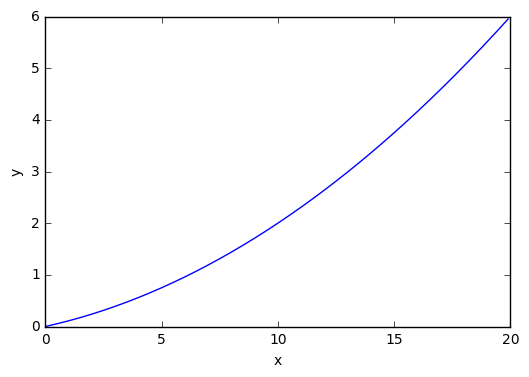

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.arange(0.0,20.0,0.1)
y = function_1(x)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x,y)
plt.show()

In [16]:
#微分係数
print numerical_diff(function_1,5)

print numerical_diff(function_1,10)

0.199999999999
0.299999999999


0.199999999999


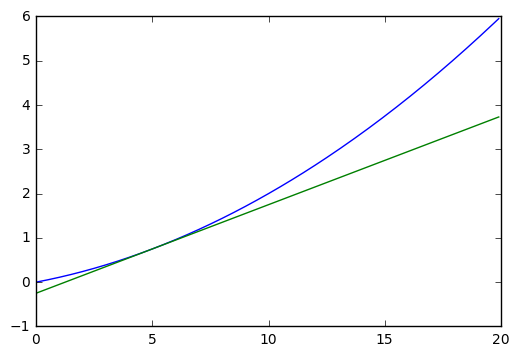

In [17]:
def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x #切片
    return lambda t: d*t + y

tf = tangent_line(function_1, 5)
y2 = tf(x)
plt.plot(x,y)
plt.plot(x,y2)
plt.show()

## 4.3.3 偏微分

In [18]:
def function_2(x):
    return np.sum(x**2.)

## 4.4 勾配

In [19]:
#実装
def numerical_gradient_no_batch(f, x):
    h = 1e-4
    grad = np.zeros_like(x) #xと同じ形状の配列を生成
    
    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h)の計算
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        #f(x-h)の計算
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / float(2*h)
        x[idx] = tmp_val #値を元にもどす
    
    return grad

In [20]:
print numerical_gradient_no_batch(function_2, np.array([2.25,2.25]))
print numerical_gradient_no_batch(function_2,np.array([0.0,2.0]))
print numerical_gradient_no_batch(function_2,np.array([3.0,0.0]))

[ 4.5  4.5]
[ 0.  4.]
[ 6.  0.]


In [21]:
def numerical_gradient(f, X):
    if X.ndim == 1:
        return numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx,x in enumerate(X):
            grad[idx] = numerical_gradient_no_batch(f,x)
        return grad

In [22]:
for i,x in enumerate(np.array([[1,2,3],[4,5,6]])):
    print i ,x

0 [1 2 3]
1 [4 5 6]


In [23]:
def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

/home/kyohei/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


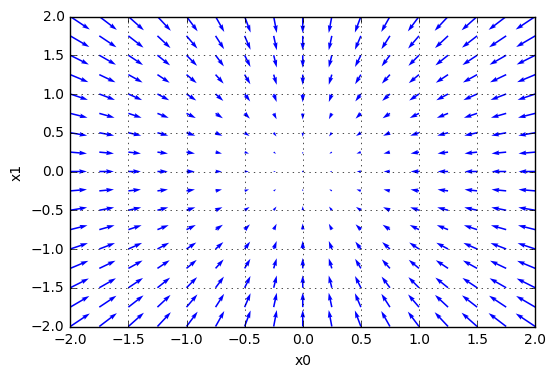

In [24]:
x0 = np.arange(-2,2.5,0.25)
x1 = np.arange(-2,2.5,0.25)

X,Y = np.meshgrid(x0,x1)
X = X.flatten()
Y = Y.flatten()

grad = numerical_gradient(function_2,np.array([X,Y]).T)
grad = grad.T
plt.figure()
plt.quiver(X,Y,-grad[0],-grad[1],angles='xy',color='b')
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()
plt.legend()
plt.draw()
plt.show()

## 4.4.1 勾配法

In [25]:
def gradient_descent(f,init_x,lr=0.01,step_num=100):
    x = init_x
    x_history = []
    for i in range(step_num):
        x_history.append(x.copy())
        
        grad = numerical_gradient(f,x)
        x -= lr*grad
    
    return x,np.array(x_history)

In [26]:
def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0,4.0])
x,x_history = gradient_descent(function_2,init_x=init_x,lr=0.1,step_num=100)

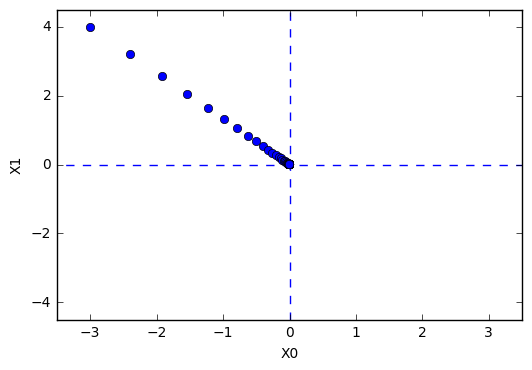

In [27]:
plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

In [28]:
#学習率が大きすぎる例
init_x = np.array([-3.0,4.0])
gradient_descent(function_2,init_x=init_x,lr=10.0,step_num=100)[0]

array([ -2.58983747e+13,  -1.29524862e+12])

In [29]:
#学習率が小さすぎる例
init_x = np.array([-3.0,4.0])
gradient_descent(function_2,init_x=init_x,lr=1e-10,step_num=100)[0]

array([-2.99999994,  3.99999992])

In [30]:
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # オーバーフロー対策
    return np.exp(x) / np.sum(np.exp(x))

In [31]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 教師データがone-hot-vectorの場合、正解ラベルのインデックスに変換
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

In [32]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

In [33]:
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)
    
    def predict(self,x):
        return np.dot(x,self.W)
    
    def loss(self,x,t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y,t)
        
        return loss

In [34]:
net = simpleNet()
print(net.W)

[[-2.9367295   0.92368182  0.21690109]
 [-1.08541324  0.2607394   1.50393244]]


In [35]:
x = np.array([0.6,0.9])
p = net.predict(x)
print(p)

[-2.73890962  0.78887455  1.48367985]


In [36]:
np.argmax(p)

2

In [37]:
t = np.array([0,0,1])
net.loss(x,t)

0.4146443542612403

In [38]:
def f(W):
    return net.loss(x,t)
dW = numerical_gradient(f,net.W)
print(dW)

[[ 0.00581067  0.19784423 -0.2036549 ]
 [ 0.008716    0.29676634 -0.30548235]]


In [39]:
class TwoLayerNet:
    def __init__(self,input_size,hidden_size,output_size,weight_init_std=0.01):
        #重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size,hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size,output_size)
        self.params['b2'] = np.zeros(output_size)
        
    def predict(self,x):
        W1,W2 = self.params['W1'],self.params['W2']
        b1,b2 = self.params['b1'],self.params['b2']
        
        a1 = np.dot(x,W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1,W2) + b2
        y = softmax(a2)
        
        return y

#x:入力データ、t：教師データ
    def loss(self,x,t):
        y = self.predict(x)
        return cross_entropy_error(y,t)
    
    def accuracy(self,x,t):
        y = predict(x)
        y = np.argmax(y,axis=1)
        t = np.argmax(t,axis=1)
        accuracy = np.sum(y==t) / float(x.shape[0])
        
        return accuracy
    
    def numerical_gradient(self,x,t):
        loss_W = lambda W:self.loss(x,t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W,self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W,self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W,self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W,self.params['b2'])
        
        return grads
    
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))

In [60]:
net = TwoLayerNet(input_size=784,hidden_size=100,output_size=10)
print net.params['W1'].shape
print net.params['b1'].shape
print net.params['W2'].shape
print net.params['b2'].shape

(784, 100)
(100,)
(100, 10)
(10,)


In [64]:
#ダミーの入力データ
x = np.random.randn(100,784)
t = np.random.rand(100,10)

grads = net.numerical_gradient(x,t)

In [65]:
print grads['W1'].shape
print grads['b1'].shape
print grads['W2'].shape
print grads['b2'].shape

(784, 100)
(100,)
(100, 10)
(10,)


In [66]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)

In [67]:
train_lost_list = []

#ハイパーパラメータ
iters_num = 10
batch_size = 10
learning_rate = 0.1

network = TwoLayerNet(input_size=784,hidden_size=50,output_size=10)

for i in range(iters_num):
    #ミニバッチの取得
    batch_mask = np.random.choice(X_train.shape[0],batch_size)
    x_batch = X_train_norm[batch_mask]
    t_batch = t_train[batch_mask]
    
    #勾配の計算
    grad = network.numerical_gradient(x_batch,t_batch)
    
    #パラメタの更新
    for key in ('W1','b1','W2','b2'):
        network.params[key] -= learning_rate * grad[key]
    
    #学習経過の記録
    loss = network.loss(x_batch,t_batch)
    train_lost_list.append(loss)

In [45]:
train = pd.read_csv('/home/kyohei/kaggle_data/02digit_recognizer/train.csv')

In [46]:
X = train.iloc[:,1:]
y = train.iloc[:,0]

In [47]:
t = pd.get_dummies(y,prefix='label_')

In [48]:
from sklearn.cross_validation import train_test_split

X = X.values
t = t.values

mms = MinMaxScaler()
X_norm = mms.fit_transform(X)

X_train,X_test,t_train,t_test = train_test_split(X_norm,t,test_size=0.3,random_state=0)

/home/kyohei/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [68]:
train_loss_list = []
train_acc_list = []
test_acc_list = []
#1エポックあたりの繰り返し回数
iter_per_epoch = max(train_size / batch_size,1)

#ハイパーパラメータ
iters_num = 10000
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size=784,hidden_size=50,output_size=10)

for i in range(iters_num):
    #ミニバッチの取得
    batch_mask = np.random.choice(X_train.shape[0],batch_size)
    x_batch = X_train_norm[batch_mask]
    t_batch = t_train[batch_mask]
    
    #勾配の計算
    grad = network.numerical_gradient(x_batch,t_batch)
    
    #パラメタの更新
    for key in ('W1','b1','W2','b2'):
        network.params[key] -= learning_rate * grad[key]
    
    #学習経過の記録
    loss = network.loss(x_batch,t_batch)
    train_lost_list.append(loss)
    
    #1エポック毎に認識精度を計算
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(X_train,t_train)
        test_acc = network.accuracy(X_test,t_test)
        train_acc_list.append(test_acc)
        print('train acc %.3f test acc %.3f') %(train_acc,test_acc)

KeyboardInterrupt: 